# 6.4 Other Methods

Leapfrog
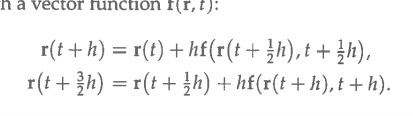


Time Reversal And energy conservation

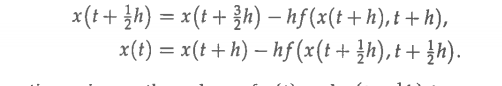

Verlet Method

$\dfrac{d\vec{r}}{dt} = \vec{f}(\vec{r},t)$

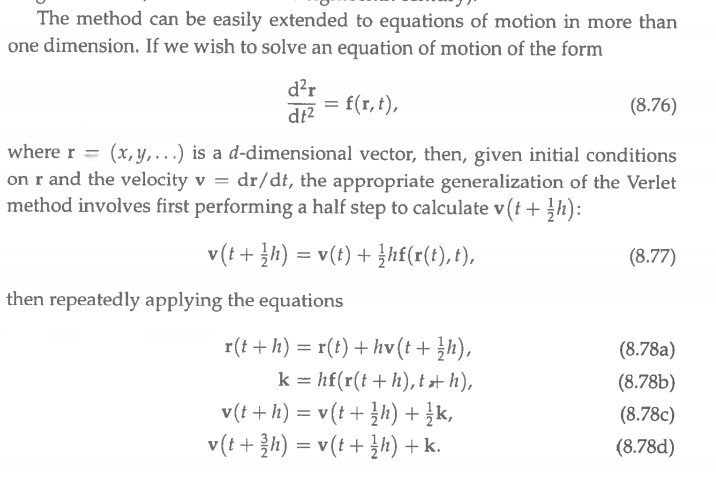

Bulirsch Toer Method

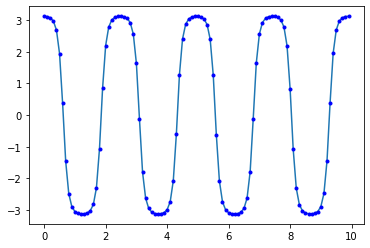

In [1]:
from math import sin,pi
from numpy import empty,array,arange
from pylab import plot,show

g = 9.81
l = 0.1
theta0 = 179*pi/180

a = 0.0
b = 10.0
N = 100          # Number of "big steps"
H = (b-a)/N      # Size of "big steps"
delta = 1e-8     # Required position accuracy per unit time

def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

tpoints = arange(a,b,H)
thetapoints = []
r = array([theta0,0.0],float)

# Do the "big steps" of size H
for t in tpoints:

    thetapoints.append(r[0])

    # Do one modified midpoint step to get things started
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    # The array R1 stores the first row of the
    # extrapolation table, which contains only the single
    # modified midpoint estimate of the solution at the
    # end of the interval
    R1 = empty([1,2],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Now increase n until the required accuracy is reached
    error = 2*H*delta
    while error>H*delta:

        n += 1
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates.  Arrays R1 and R2
        # hold the two most recent lines of the table
        R2 = R1
        R1 = empty([n,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    # Set r equal to the most accurate estimate we have,
    # before moving on to the next big step
    r = R1[n-1]

# Plot the results
plot(tpoints,thetapoints)
plot(tpoints,thetapoints,"b.")
show()